### Importing Required Libraries
We start by importing all necessary Python libraries for data manipulation, visualization, and preprocessing.

In [188]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df = pd.read_csv('Cars_data.csv')

# Data Cleaning

### Dropping Irrelevant Columns
Then we remove columns that are not useful for analysis or modeling.

In [189]:
# Drop unnecessary columns
df.drop(columns=['Ad ID','Car Name','Registration city','Car documents','Assembly','Condition','Seller Location','Description','Car Features',"Images URL's",'Car Profile'],inplace=True)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          9179 non-null   object
 1   Model         9179 non-null   object
 2   Year          9179 non-null   int64 
 3   KM's driven   9179 non-null   int64 
 4   Price         9179 non-null   int64 
 5   Fuel          9179 non-null   object
 6   Transmission  9179 non-null   object
dtypes: int64(3), object(4)
memory usage: 502.1+ KB


### Renaming Columns and Cleaning Names
Here, we standardize column names to remove spaces and ensure consistency.

In [191]:
# Clean column names
df.columns = df.columns.str.replace("'",'').str.replace(' ','_')
df.rename(columns={'KMs_driven':'Km_driven'},inplace=True)

### Converting Data Types
We convert numerical columns like Price, Km_driven, and Year to integer types and handle missing values.

In [192]:
# Convert datatypes and fill missing
df['Price'] = pd.to_numeric(df['Price'],errors='coerce').astype(int)
df['Km_driven'] = pd.to_numeric(df['Km_driven'],errors='coerce').astype(int)
df['Year'] = pd.to_numeric(df['Year'],errors='coerce').astype(int)

df['Fuel'] = df['Fuel'].fillna('Unknown')
df['Transmission'] = df['Transmission'].fillna('Unknown')

df['Make'] = df['Make'].str.title()
df['Model'] = df['Model'].str.title()

### Checking Data Types
We verify that all columns have the correct data types after conversion.

In [193]:
# Check datatypes
df.dtypes

Make            object
Model           object
Year             int64
Km_driven        int64
Price            int64
Fuel            object
Transmission    object
dtype: object

Checking all unique categories in the Fuel and Transmission column.

In [194]:
# Check fuel categories
df['Fuel'].unique()

array(['Petrol', 'CNG', 'Hybrid', 'Diesel'], dtype=object)

In [195]:
# Check transmission categories
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

### Checking for Missing Values
We identify columns with missing data to handle them later.

In [196]:
# Check null values
df.isnull().any()

Make            False
Model           False
Year            False
Km_driven       False
Price           False
Fuel            False
Transmission    False
dtype: bool

In [197]:
df.isnull().sum()

Make            0
Model           0
Year            0
Km_driven       0
Price           0
Fuel            0
Transmission    0
dtype: int64

### Handling Missing Data
After identifying missing values, we drop rows with nulls to ensure data consistency before analysis.

In [198]:
# Drop rows with nulls
df.dropna(axis=0,inplace=True)
df.isnull().sum().sum()

np.int64(0)

In [199]:
df.duplicated().sum()

np.int64(384)

In [200]:
df[df.duplicated()]

Make        Model  Year  Km_driven    Price    Fuel Transmission
606      Honda   City Ivtec  2019      60000  3875000  Petrol    Automatic
817     Suzuki         Ravi  2022       2700  1850000  Petrol       Manual
883   Daihatsu   Terios Kid  2001     120000  1570000  Petrol    Automatic
1103  Daihatsu        Cuore  2000      15000   650000  Petrol       Manual
1254   Hyundai       Santro  2006     123521   798000  Petrol       Manual
...        ...          ...   ...        ...      ...     ...          ...
9129    Suzuki   Mehran Vxr  2007     120000   690000  Petrol       Manual
9137    Toyota  Corolla Gli  2013     354720  2450000  Petrol       Manual
9148    Suzuki   Cultus Vxr  2010       1234   985000  Petrol       Manual
9159    Suzuki        Swift  2018     151000  2425000  Petrol       Manual
9160    Suzuki   Cultus Vxr  2005     100000   590000  Petrol       Manual

[384 rows x 7 columns]

In [201]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

np.int64(0)

In [202]:
df.describe()

Year      Km_driven         Price
count  8795.000000    8795.000000  8.795000e+03
mean   2012.247527   96910.354179  2.036285e+06
std       6.041138   62193.661768  1.157100e+06
min    1989.000000       1.000000  1.850000e+05
25%    2007.000000   53750.000000  1.030000e+06
50%    2013.000000   92000.000000  1.815000e+06
75%    2017.000000  126382.500000  2.750000e+06
max    2024.000000  533528.000000  5.000000e+06

In [203]:
df.shape

(8795, 7)

# Encoding The Data

### Label Encoding Categorical Features

Here we change the object type columns into a numerical type column for future Machine Learning Regression Models.
I also included their char-int counterparts.

In [204]:
# Encode categorical data
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col].astype(str)).astype(int)
    print(f'Mapping for : {col}')
    for index , value in enumerate(le.classes_):
        print(f"{value}: {index}")
    print()

Mapping for : Make
Changan: 0
Chevrolet: 1
Daihatsu: 2
Faw: 3
Honda: 4
Hyundai: 5
Kia: 6
Mercedes: 7
Mitsubishi: 8
Suzuki: 9
Toyota: 10

Mapping for : Model
Alsvin: 0
Altis Grande: 1
Alto: 2
Baleno: 3
Bolan: 4
C Class: 5
Cervo: 6
City Aspire: 7
City Idsi: 8
City Ivtec: 9
City Vario: 10
Civic Exi: 11
Civic Oriel: 12
Civic Prosmetic: 13
Civic Vti: 14
Civic Vti Oriel: 15
Classic: 16
Corolla Assista: 17
Corolla Axio: 18
Corolla Gli: 19
Corolla Xli: 20
Corrolla Altis: 21
Cultus Vxl: 22
Cultus Vxr: 23
Cuore: 24
E Class: 25
Ek Wagon: 26
Every: 27
Every Wagon: 28
Exclusive: 29
Hijet: 30
Isis: 31
Joy: 32
Karvaan: 33
Khyber: 34
Lancer: 35
Liana: 36
Mehran Vx: 37
Mehran Vxr: 38
Minica: 39
Minicab Bravo: 40
Mira: 41
Move: 42
Pajero Mini: 43
Passo: 44
Picanto: 45
Prius: 46
Ravi: 47
Santro: 48
Spectra: 49
Sportage: 50
Surf: 51
Swift: 52
Terios Kid: 53
V2: 54
Wagon R: 55
X-Pv: 56
Yaris: 57

Mapping for : Fuel
CNG: 0
Diesel: 1
Hybrid: 2
Petrol: 3

Mapping for : Transmission
Automatic: 0
Manual: 1



### Viewing Encoded Columns
We inspect the newly created encoded columns to confirm successful conversion from categorical to numeric values.

In [205]:
df_encoded.head()

Make  Model  Year  Km_driven    Price    Fuel Transmission  \
0    Toyota  Passo  2021      54000  4190000  Petrol    Automatic   
1    Suzuki   Ravi  2018      95000  1300000  Petrol       Manual   
2    Suzuki  Bolan  2015      50000   800000  Petrol       Manual   
3  Daihatsu   Move  2013      94000  2155000  Petrol    Automatic   
4    Suzuki  Swift  2011     126544  1440000  Petrol       Manual   

   Make_encoded  Model_encoded  Fuel_encoded  Transmission_encoded  
0            10             44             3                     0  
1             9             47             3                     1  
2             9              4             3                     1  
3             2             42             3                     0  
4             9             52             3                     1

In [206]:
df_encoded.tail()

Make    Model  Year  Km_driven    Price    Fuel Transmission  \
8790    Suzuki  Wagon R  2014     115000  2725000  Petrol    Automatic   
8791    Suzuki  Wagon R  2017     100000  1850000  Petrol       Manual   
8792       Kia  Spectra  2001     123456  1100000  Petrol    Automatic   
8793    Suzuki     Alto  2009      89000   970000  Petrol       Manual   
8794  Daihatsu     Move  2016      95000  2050000  Petrol    Automatic   

      Make_encoded  Model_encoded  Fuel_encoded  Transmission_encoded  
8790             9             55             3                     0  
8791             9             55             3                     1  
8792             6             49             3                     0  
8793             9              2             3                     1  
8794             2             42             3                     0

In [207]:
df_encoded.describe()

Year      Km_driven         Price  Make_encoded  Model_encoded  \
count  8795.000000    8795.000000  8.795000e+03   8795.000000    8795.000000   
mean   2012.247527   96910.354179  2.036285e+06      6.484821      25.591359   
std       6.041138   62193.661768  1.157100e+06      3.158117      17.678771   
min    1989.000000       1.000000  1.850000e+05      0.000000       0.000000   
25%    2007.000000   53750.000000  1.030000e+06      4.000000       9.000000   
50%    2013.000000   92000.000000  1.815000e+06      9.000000      23.000000   
75%    2017.000000  126382.500000  2.750000e+06      9.000000      41.000000   
max    2024.000000  533528.000000  5.000000e+06     10.000000      57.000000   

       Fuel_encoded  Transmission_encoded  
count   8795.000000           8795.000000  
mean       2.936896              0.611143  
std        0.429996              0.487519  
min        0.000000              0.000000  
25%        3.000000              0.000000  
50%        3.000000              1.000000  
75%        3.000000              1.000000  
max        3.000000              1.000000

In [208]:
df_encoded.shape

(8795, 11)

# Exploratory Data Analysis (EDA)

### Visualizing Data Distributions
We start visualizing data to understand the spread and central tendencies of key numerical columns like Price, Year, and Km_driven.

### Mileage Distribution (Distplot)

This Graph shows the Mileage Distribution across the Amount of cars.

/tmp/ipython-input-3748571954.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded['Km_driven'], kde = True)


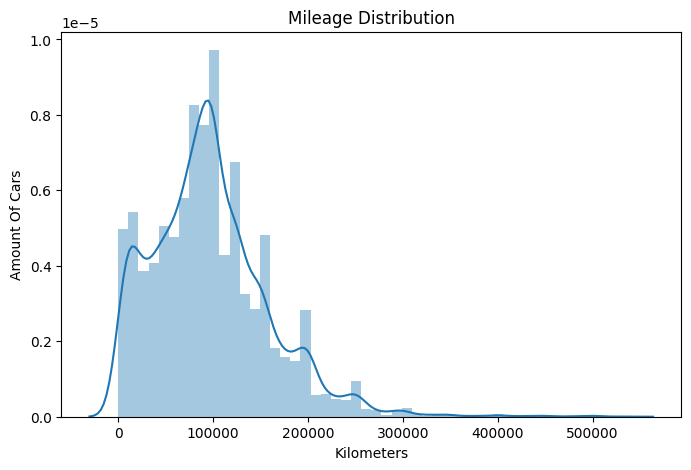

In [209]:
# Display plot
plt.figure(figsize=(8,5))
sns.distplot(df_encoded['Km_driven'], kde = True)
plt.title('Mileage Distribution')
plt.xlabel('Kilometers')
plt.ylabel('Amount Of Cars')
plt.show()

### Price Distribution (Histplot)

Here we visualize the Price Distribution across the car.
It also shows the different statistics of the graph below.

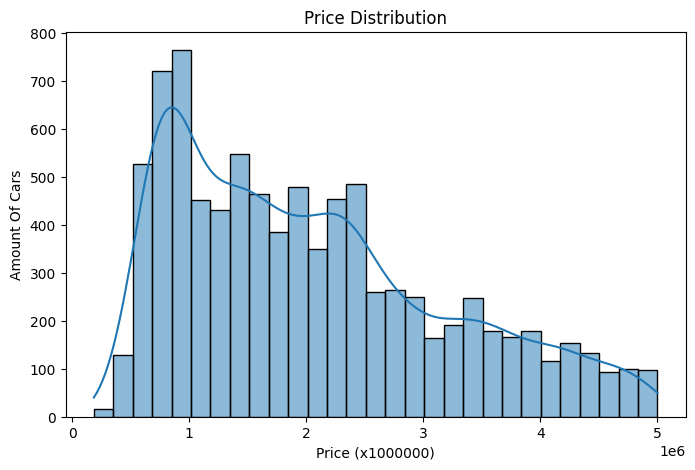


These are some Price Statistics
Skewness: 0.68
Kurtosis: -0.46
Mean: 2036285.40
Median: 1815000.00
Standard Deviation: 1157100.49


In [210]:
# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df_encoded['Price'], kde = True)
plt.title('Price Distribution')
plt.xlabel('Price (x1000000)')
plt.ylabel('Amount Of Cars')
plt.show()

print('\nThese are some Price Statistics')
print(f'Skewness: {df_encoded["Price"].skew():.2f}')
print(f'Kurtosis: {df_encoded["Price"].kurt():.2f}')
print(f'Mean: {df_encoded["Price"].mean():.2f}')
print(f'Median: {df_encoded["Price"].median():.2f}')
print(f'Standard Deviation: {df_encoded["Price"].std():.2f}')

### Analyzing Fuel Type vs Price (Barplot)

We visualize the average price across different fuel types to see if specific fuels affect car value.

/tmp/ipython-input-2427078512.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_fuel.index, y=avg_price_fuel.values, palette="coolwarm")


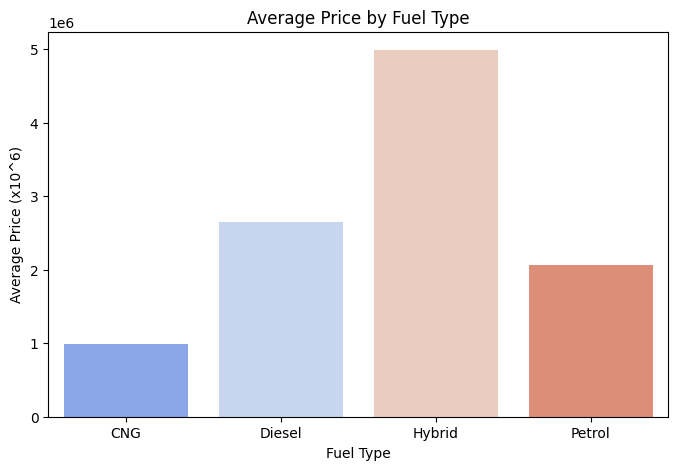

In [211]:
# Create bar plot
avg_price_fuel = df_encoded.groupby("Fuel")["Price"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_fuel.index, y=avg_price_fuel.values, palette="coolwarm")
plt.title("Average Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price (x10^6)")
plt.show()

### Avg. Kilometers Driven (Boxplot)

This graph visualizes the avg distance, of the majority of the cars.

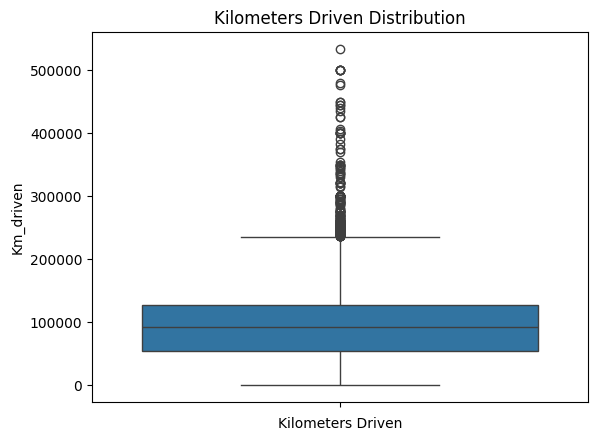

In [212]:
# Display plot
sns.boxplot(y = df_encoded['Km_driven'])
plt.title('Kilometers Driven Distribution')
plt.xlabel('Kilometers Driven')
plt.show()

### Transmission Type Impact on Price (Multi-Boxplot)

We compare average car prices between Manual and Automatic transmissions.

/tmp/ipython-input-1402318079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission',y='Price',data=df_encoded, palette="coolwarm")


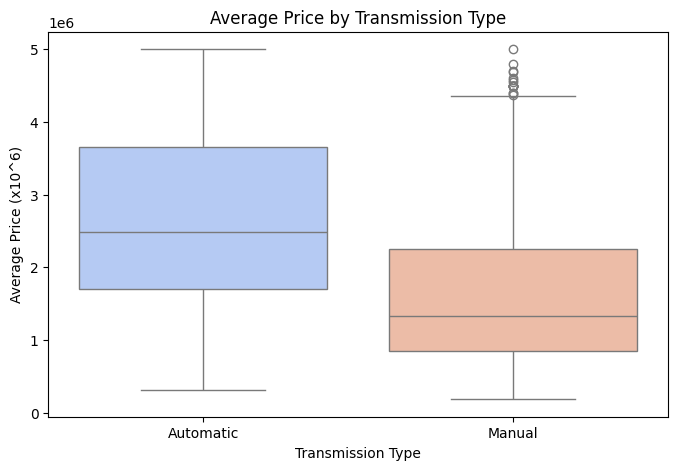

In [213]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Transmission',y='Price',data=df_encoded, palette="coolwarm")
plt.title("Average Price by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Average Price (x10^6)")
plt.show()

### Year-wise Price Trend (Scatterplot)

We examine how the manufacturing year affects the average selling price of cars.

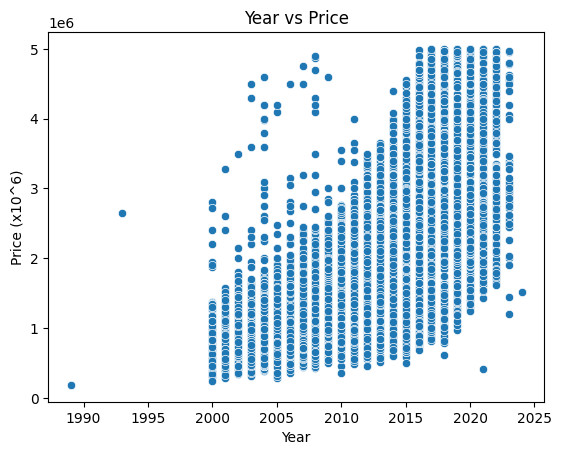

In [214]:
# Display plot
sns.scatterplot(x = 'Year', y = 'Price', data = df_encoded)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price (x10^6)')
plt.show()

### Correlation Analysis (Heatmap)

We create a heatmap to visualize relationships between numerical features and understand which factors influence car prices.

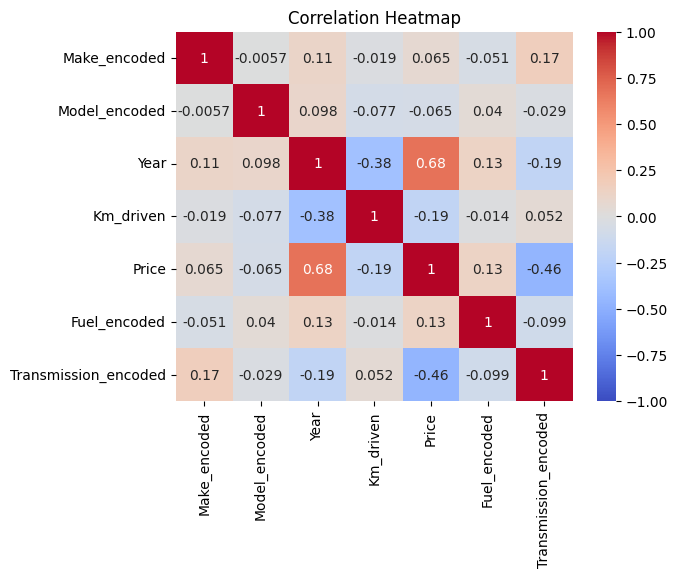

In [215]:
# Plot correlation heatmap
int_cols = ['Make_encoded','Model_encoded','Year','Km_driven','Price','Fuel_encoded','Transmission_encoded']
correlate_int_cols = df_encoded[int_cols].corr()
sns.heatmap(correlate_int_cols, annot=True,vmin = -1,vmax = 1, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

####Heatmap Correlations

In the above heatmap, we can see that the price has the best direct correlation with year,
as the year increases the price of cars also increase.

There is also another example with the price and Kilometers driven (Km driven) which is an inverse correlation.
Meaning that as the car is more driven the more the price value of that car decreases.

Transmission type also has a clear direct correlation as Automatic cars tend to be worth more than manuals.

### Final Observations (Pairplot)
We summarize insights obtained from the visualizations and analysis for concluding remarks using a pairplot.

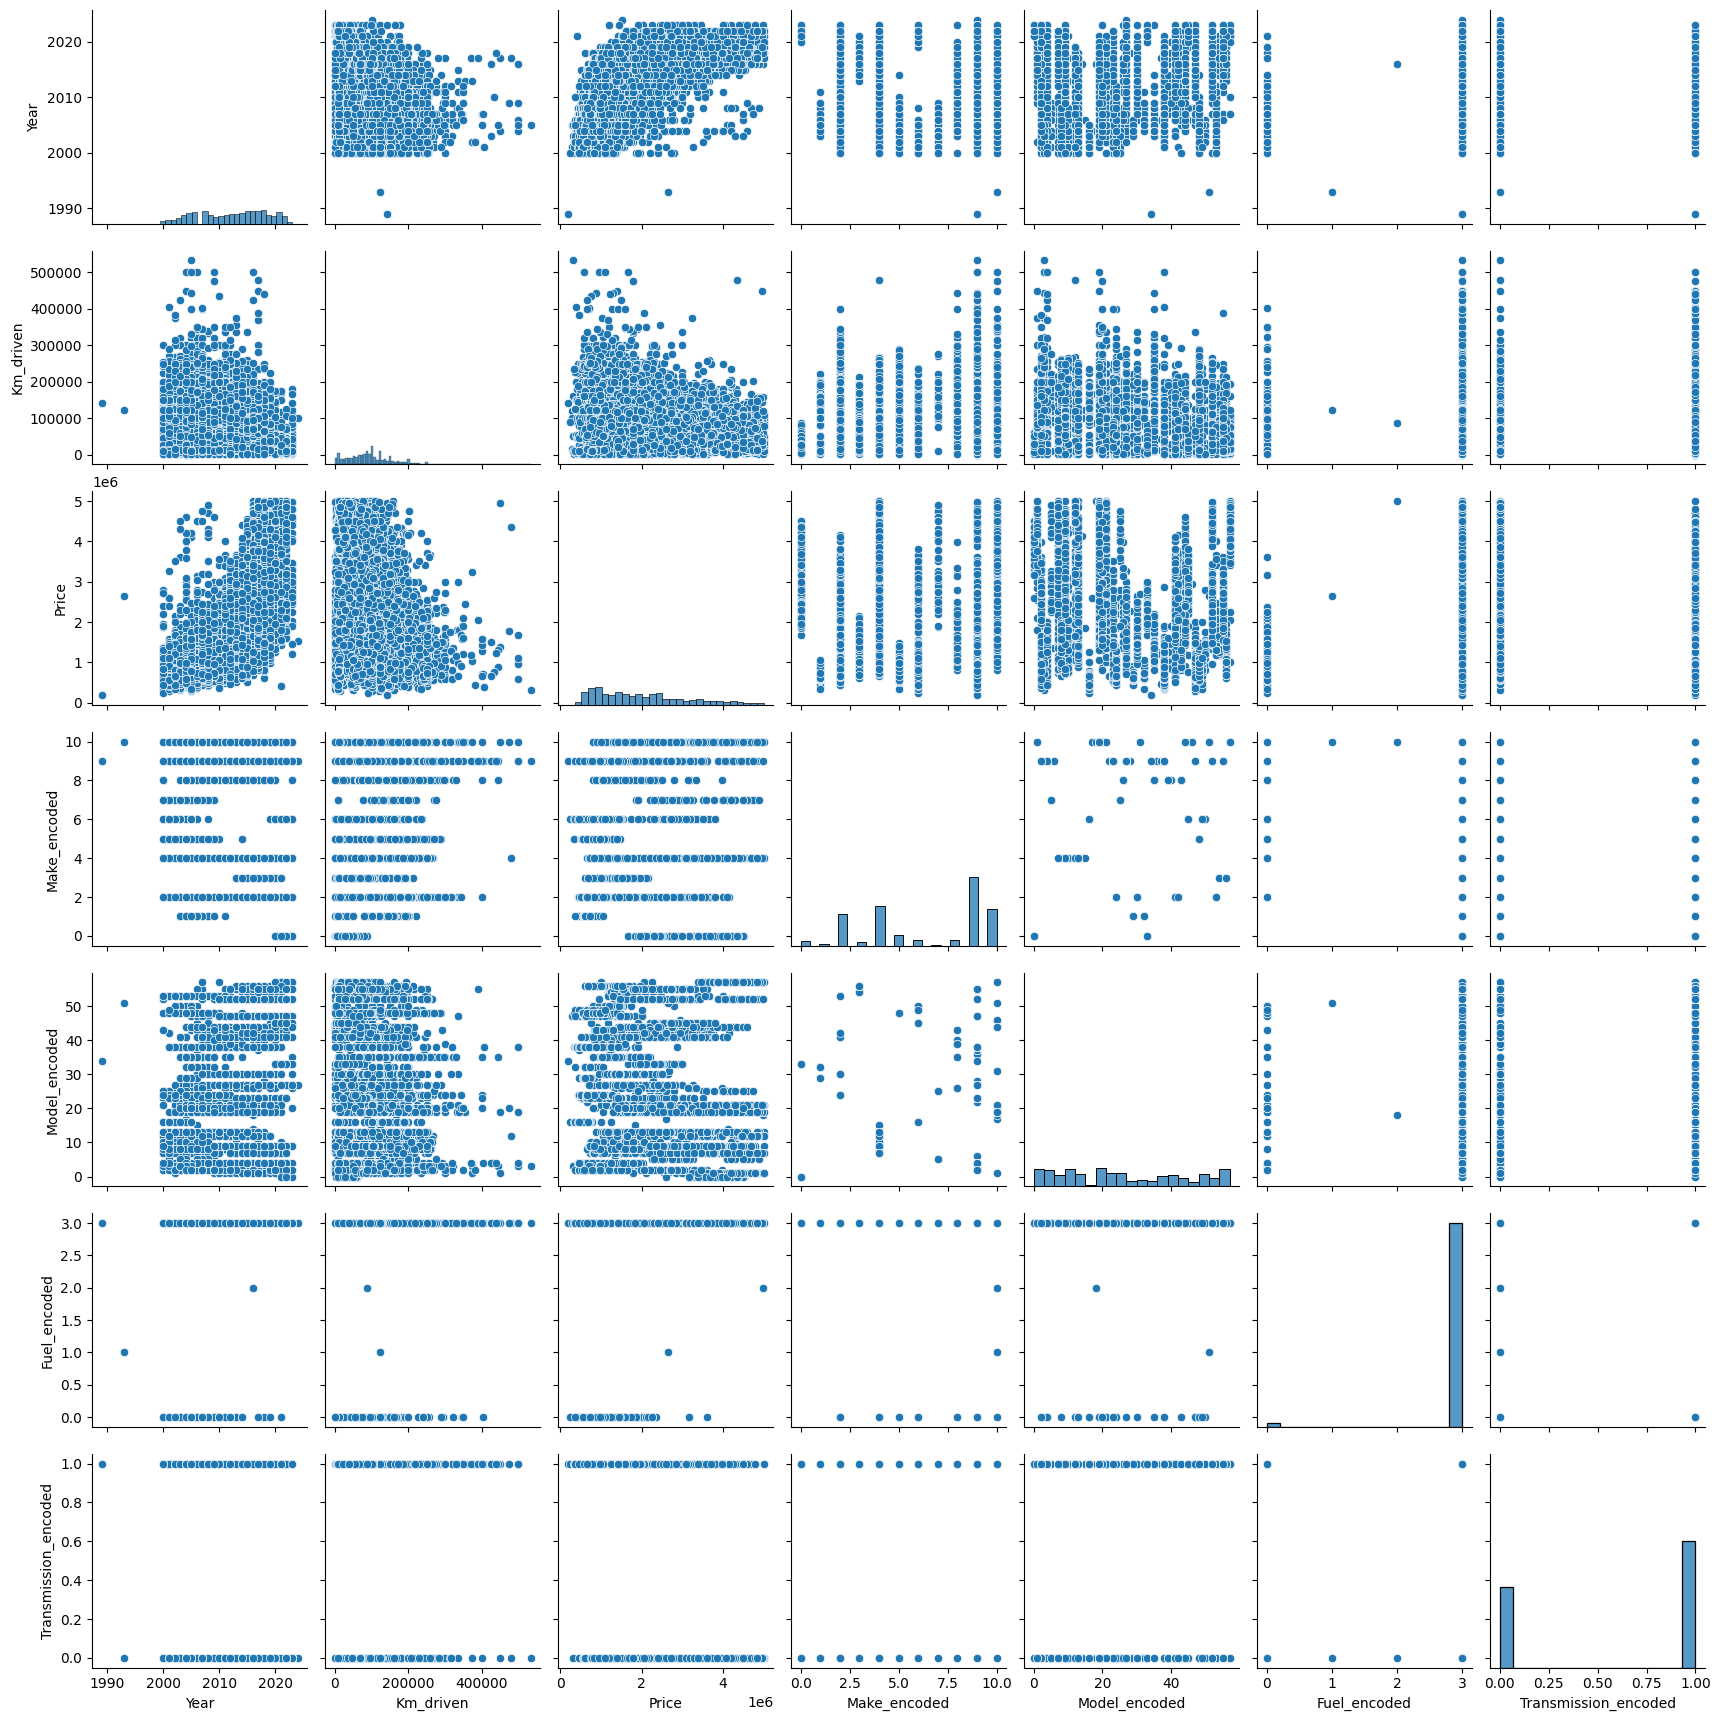

In [216]:
# Display plot
sns.pairplot(df_encoded)
plt.show()

# Machine Learning Analysis

Here we do the MLA using different types of Algorithms

In [217]:
df_scaled = df_encoded.copy()

In [218]:
# Spliting the data for training and testing
factors = ['Make_encoded','Model_encoded','Year','Km_driven','Fuel_encoded','Transmission_encoded']
x = pd.DataFrame(df_scaled[factors].copy())
y = pd.DataFrame(df_scaled['Price'].copy())
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=6969)

###Scaling the Data
Here, we use StandardScaler to scale the data for the algorithms

In [219]:
numerical_col = ['Year','Km_driven']
scaler = StandardScaler()
x_train[numerical_col] = scaler.fit_transform(x_train[numerical_col])
x_test[numerical_col] = scaler.transform(x_test[numerical_col])

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

A common function for regression type models.

In [220]:
#Regression Model
def regression_models(model_type):
  model_type.fit(x_train, y_train.ravel())
  y_pred = model_type.predict(x_test)

  model_type.score(x_test, y_test)

  MAE = mean_absolute_error(y_test, y_pred)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(y_test, y_pred)

  return [f'{MAE:.2f}', f'{MSE:.2f}', f'{RMSE:.2f}', f'{r2:.2f}']

Function to Display the results neatly from the model results.

In [221]:
def display_results(results):
  for model, metrics in results.items():
    print(f'{model}:')
    print(f'Mean Absolute Error: {metrics[0]}')
    print(f'Mean Squared Error: {metrics[1]}')
    print(f'Root Mean Squared Error: {metrics[2]}')
    print(f'R^2: {metrics[3]}\n')

Currently we are using 6 different models to test their scores.
- Linear Regression
- Random Forest Regression
- Decision Tree Regression
- Support Vector Regression (SVR)
- Nearest Neighbours Regression (KNR)
- Gradient Boosting Regression

In [222]:
#Results for the different models
lm_result = regression_models(LinearRegression())
rfs_result = regression_models(RandomForestRegressor(n_estimators=100,random_state=69420))
dtr_result = regression_models(DecisionTreeRegressor(random_state=420))
svr_result = regression_models(SVR())
knr_result = regression_models(KNeighborsRegressor())
gbr_result = regression_models(GradientBoostingRegressor())

display_results({
    'Linear Regression': lm_result,
    'Random Forest': rfs_result,
    'Decision Tree': dtr_result,
    'Support Vector Machine': svr_result,
    'K-Nearest Neighbors': knr_result,
    'Gradient Boosting': gbr_result
})

Linear Regression:
Mean Absolute Error: 0.50
Mean Squared Error: 0.40
Root Mean Squared Error: 0.63
R^2: 0.60

Random Forest:
Mean Absolute Error: 0.18
Mean Squared Error: 0.07
Root Mean Squared Error: 0.27
R^2: 0.93

Decision Tree:
Mean Absolute Error: 0.23
Mean Squared Error: 0.12
Root Mean Squared Error: 0.34
R^2: 0.88

Support Vector Machine:
Mean Absolute Error: 0.38
Mean Squared Error: 0.31
Root Mean Squared Error: 0.56
R^2: 0.68

K-Nearest Neighbors:
Mean Absolute Error: 0.19
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28
R^2: 0.92

Gradient Boosting:
Mean Absolute Error: 0.20
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28
R^2: 0.92



To compare the results we have made a table.

In [223]:
#Displaying in a Table format
results_df = pd.DataFrame({
    'Linear Regression': lm_result,
    'Random Forest': rfs_result,
    'Decision Tree': dtr_result,
    'Support Vector Machine': svr_result,
    'K-Nearest Neighbors': knr_result,
    'Gradient Boosting': gbr_result
}, index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R^2']).T

display(results_df)

Mean Absolute Error Mean Squared Error  \
Linear Regression                     0.50               0.40   
Random Forest                         0.18               0.07   
Decision Tree                         0.23               0.12   
Support Vector Machine                0.38               0.31   
K-Nearest Neighbors                   0.19               0.08   
Gradient Boosting                     0.20               0.08   

                       Root Mean Squared Error   R^2  
Linear Regression                         0.63  0.60  
Random Forest                             0.27  0.93  
Decision Tree                             0.34  0.88  
Support Vector Machine                    0.56  0.68  
K-Nearest Neighbors                       0.28  0.92  
Gradient Boosting                         0.28  0.92

In conclusion, the best regression models for this dataset are :
- Random Forest (1st)
- Gradient Boosting (2nd)
- Nearest Neighbors (3rd)

Models that were not compatible with this dataset are:
- Support Vector
- Linear Regression